In [2]:
import pandas as pd

In [3]:
wine_df = pd.read_csv("wine-clustering.csv")
wine_df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
wine_df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
wine_df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
wine_df_scaled = scaler.fit_transform(wine_df)

## K Means Algoritması

In [12]:
from sklearn.cluster import KMeans

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k,n_init=10)
    kmeans.fit(wine_df_scaled)
    inertia.append(kmeans.inertia_)

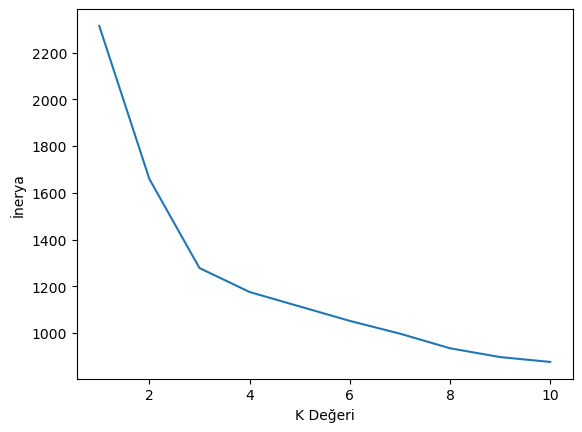

In [13]:
import matplotlib.pyplot as plt

plt.plot(range(1, 11), inertia)
plt.xlabel("K Değeri")
plt.ylabel("İnerya")
plt.show()

In [14]:
k = 3
kmeans = KMeans(n_clusters=k, n_init=10)
kmeans.fit(wine_df_scaled)

KMeans(n_clusters=3, n_init=10)

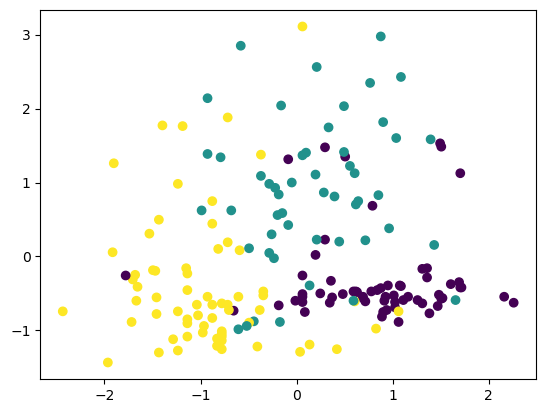

In [15]:
labels = kmeans.labels_
plt.scatter(wine_df_scaled[:, 0], wine_df_scaled[:, 1], c=labels)
plt.show()

## DBSCAN Algoritması

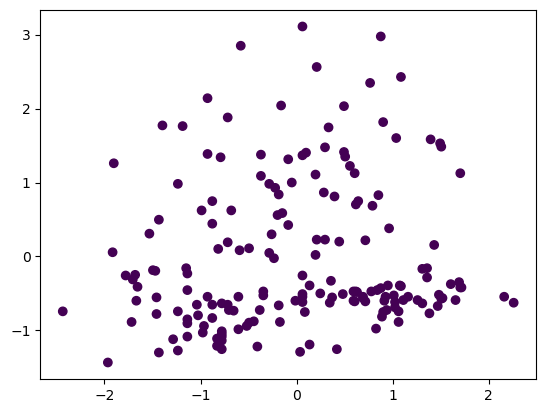

In [16]:
from sklearn.cluster import DBSCAN

best_eps = None
best_minpts = None

for eps in [0.3, 0.5, 0.7]:
    for minpts in [5, 10, 20]:
        dbscan = DBSCAN(eps=eps, min_samples=minpts)
        dbscan.fit(wine_df_scaled)

        
        if dbscan.labels_.max() > 1:
            best_eps = eps
            best_minpts = minpts
            break
            
    if best_minpts is None:
        best_minpts = minpts
    if best_eps is None:
        best_eps = eps

dbscan = DBSCAN(eps=best_eps, min_samples=best_minpts)
dbscan.fit(wine_df_scaled)

labels = dbscan.labels_
plt.scatter(wine_df_scaled[:, 0], wine_df_scaled[:, 1], c=labels)
plt.show()
